![logo](../../picture/license_header_logo.png)
> **Copyright &copy; 2020 - 2021 CertifAI Sdn. Bhd.**<br>
 <br>
This program and the accompanying materials are made available under the
terms of the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). <br>
Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS, WITHOUT
WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the
License for the specific language governing permissions and limitations
under the License. <br>
<br>**SPDX-License-Identifier: Apache-2.0**

TODO: add exercise

# Time Series Decomposition

***
```
Decomposition is primarily used for time series analysis, and as an analysis tool it can be used to inform forecasting models on your problem. It provides a structured way of thinking about a time series forecasting problem, both generally in terms of modeling complexity and specifically in terms of how to best capture each of these components in a given model.

Each of these components are something you may need to think about and address during data preparation, model selection, and model tuning. You may address it explicitly in terms of modeling the trend and subtracting it from your data, or implicitly by providing enough history for an algorithm to model a trend if it may exist.

machinelearningmastery.com
```
***


Time Series can be decomposed into seasonal, trend, and remainder component. Classical method of spliting the components are using additive or multiplicative method. 


Additive method,

\\[ y_t = S_t + T_t + R_t \\]

Multiplicative method,

\\[ y_t = S_t \times T_t \times R_t \\]

Where $S_t$ is the seasonal component, $T_t$ is the trend component, and $R_t$ is the remainder component.

Additive method is more preferable when the magnitude of the seasonal fluctuations does not vary with the level of the time series. When the variation in the seasonal pattern appears to be proportional to the level of the time series, then multiplicative method is preferable.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
ausbeer = pd.read_csv('../../datasets/decomposition/AusBeer.csv')
ausbeer_ts = pd.Series(ausbeer['Beer.Production'].values, 
                       index = pd.date_range('1956', periods = len(ausbeer), freq='Q'))
ausbeer_ts = ausbeer_ts[:17*4]

In [3]:
airpassengers = pd.read_csv('../../datasets/decomposition/AirPassengers.csv')
airpassengers_ts = pd.Series(airpassengers['#Passengers'].values,
                            index = pd.to_datetime(airpassengers.Month))
airpassengers_ts

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Length: 144, dtype: int64

Text(0.5, 1.0, 'airpassengers')

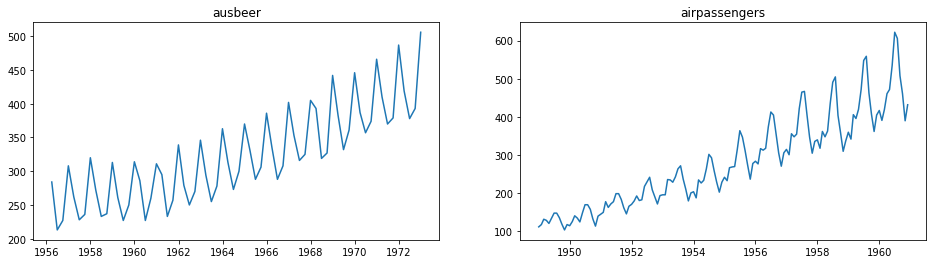

In [4]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 4))

ax1.plot(ausbeer_ts)
ax1.set_title('ausbeer')

ax2.plot(airpassengers_ts)
ax2.set_title('airpassengers')

From the graph above we can see the seasonal fluctuation of ausbeer is constant, and the seasonal fluctuation of the airpassengers is increase through out the years. Hence we are using additive method to extract seasonal, trend, and remainder components from ausbeer and multiplicative method to extract airpassengers components



Text(0.5, 1.0, 'airpassengers with log transformation')

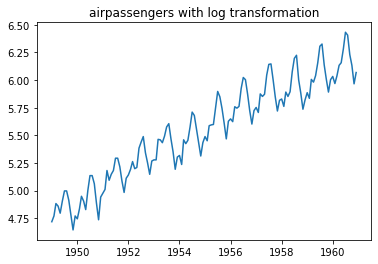

In [5]:
plt.plot(np.log(airpassengers_ts))
plt.title('airpassengers with log transformation')

However, We can still use additive method in multiplicative problem if we apply log transformation on dataset. The graph above shows the seasonal fluctuation become constant after the log transformation is applied.

$$  y_t = S_t \times T_t \times R_t \qquad \equiv \qquad log y_t = log S_t + log T_t + log R_t $$

## Trend Estimation

Trend of time series can be estimated using Simple Moving Average (SMA). SMA calculate the averages of the different subsets across the dataset.

$$ M_t =  \frac{X_t + X_{t-1} + ... + X_{t-N+1}}{N}  $$


In [6]:
# using SMA with window of 4 time steps
ausbeer_trend = ausbeer_ts.rolling(window=4).mean() 

In [7]:
# using SMA with window of 12 time steps
airpassengers_trend = airpassengers_ts.rolling(window=12).mean()

Text(0.5, 1.0, 'airpassengers trend')

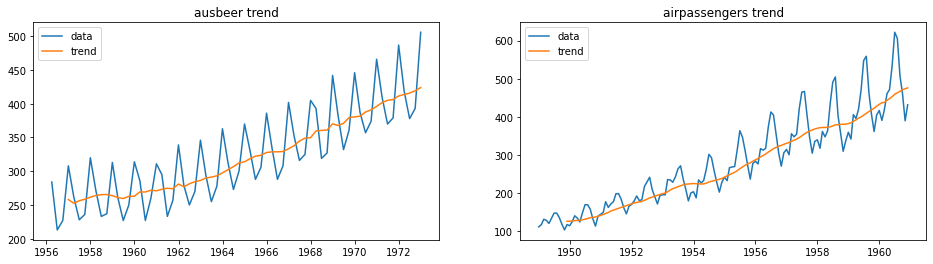

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 4))

ax1.plot(ausbeer_ts)
ax1.plot(ausbeer_trend)
ax1.legend(['data', 'trend'])
ax1.set_title('ausbeer trend')

ax2.plot(airpassengers_ts)
ax2.plot(airpassengers_trend)
ax2.legend(['data', 'trend'])
ax2.set_title('airpassengers trend')

## Detrend 

Detrend is the process of remove trend from the time series, a necessary step before estimating seasonality. Additive method detrend by reduce trend from data and multiplicative method detrend by dividing the data with the trend.

Additive detrend, 
$$ y_t - \hat{T_t} $$

Multiplicative detrend, 
$$ \frac{y_t}{\hat{T_t}} $$

In [9]:
ausbeer_detrend = ausbeer_ts - ausbeer_trend
airpassengers_detrend = airpassengers_ts / airpassengers_trend

Text(0.5, 1.0, 'airpassengers detrend')

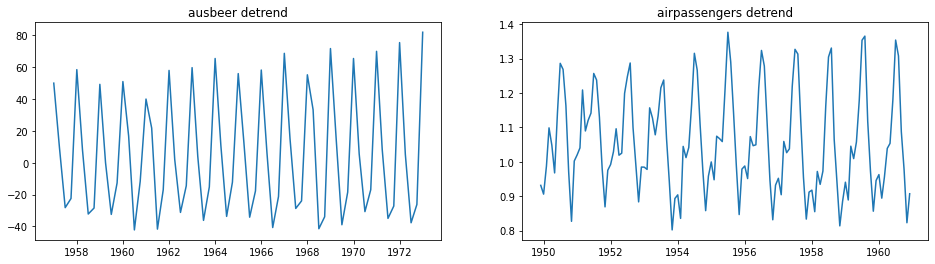

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 4))

ax1.plot(ausbeer_detrend)
ax1.set_title('ausbeer detrend')

ax2.plot(airpassengers_detrend)
ax2.set_title('airpassengers detrend')

## Seasonality Estimation

Seasonality is estimated by averaging the quarterly/monthly detrended data based on its period. the average of the seasonal will be use repeatedly to explain the seasonal variations of the time series.

In [11]:
ausbeer_detrend_reshape = ausbeer_detrend.values.reshape(-1, 4) # since 4 quarters in a year
ausbeer_seasonal_mean = np.nanmean(ausbeer_detrend_reshape, axis=0)
ausbeer_seasonal = np.tile(ausbeer_seasonal_mean, ausbeer_detrend_reshape.shape[0])


In [12]:
airpassengers_detrend_reshape = airpassengers_detrend.values.reshape(-1, 12) # since 12 months in a year
airpassengers_seasonal_mean = np.nanmean(airpassengers_detrend_reshape, axis=0)
airpassengers_seasonal = np.tile(airpassengers_seasonal_mean, 12)

Text(0.5, 1.0, 'Airpassenger seasonal')

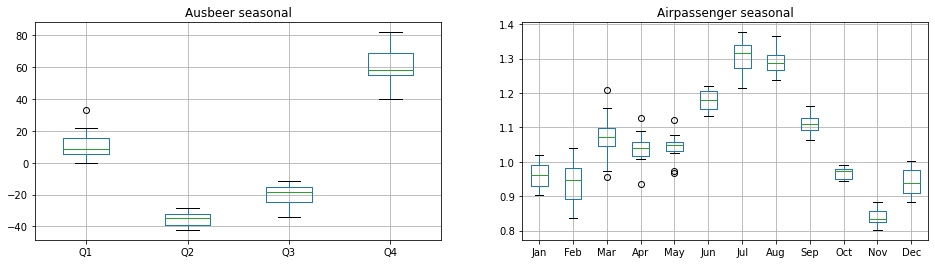

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

pd.DataFrame(ausbeer_detrend_reshape, columns=['Q1', 'Q2', 'Q3', 'Q4']).boxplot(ax=ax1) 
ax1.set_title('Ausbeer seasonal')

pd.DataFrame(airpassengers_detrend_reshape, 
             columns=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).boxplot(ax=ax2) 
ax2.set_title('Airpassenger seasonal')

Text(0.5, 1.0, 'airpassengers seasonal')

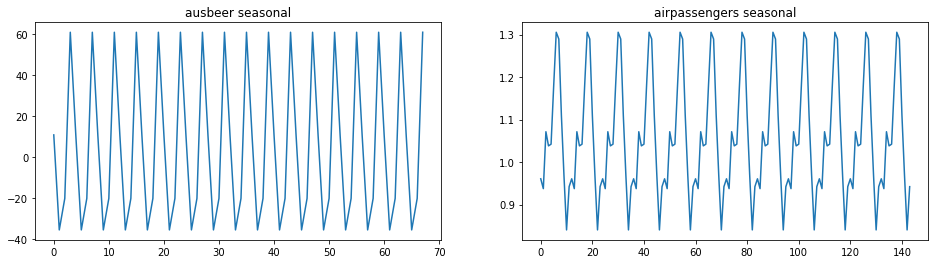

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 4))

ax1.plot(ausbeer_seasonal)
ax1.set_title('ausbeer seasonal')

ax2.plot(airpassengers_seasonal)
ax2.set_title('airpassengers seasonal')

## Remainder

Remainder is the left over after the estimation of seasonal and trend. Hence, for additive method, the remainder is calculated by reducing season and trend from raw data, and multiplicative method divide the raw data with multiplication of seasonal and trend. 

Additive residual,
$$ y_t - \hat{S_t} - \hat{T_t} $$

Multiplicative residual,

$$ \frac{y_t}{\hat{S_t} \times \hat{T_t}} $$

In [15]:
ausbeer_remainder = ausbeer_ts - ausbeer_trend - ausbeer_seasonal

In [16]:
airpassengers_remainder = airpassengers_ts / (airpassengers_trend * airpassengers_seasonal)

Text(0.5, 1.0, 'airpassengers remainder')

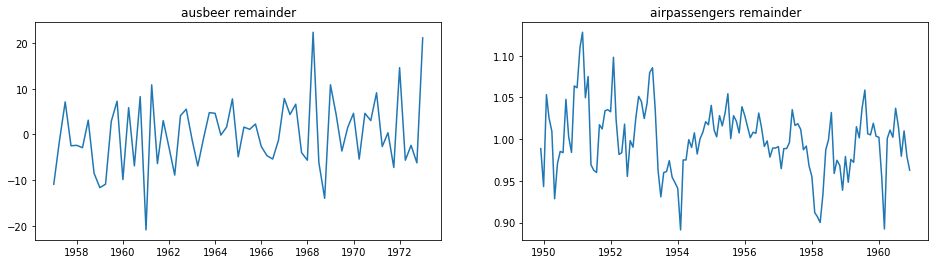

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 4))

ax1.plot(ausbeer_remainder)
ax1.set_title('ausbeer remainder')

ax2.plot(airpassengers_remainder)
ax2.set_title('airpassengers remainder')

## Reconstruct the Original Signal

In [18]:
ausbeer_reconstruct = ausbeer_trend + ausbeer_seasonal + ausbeer_remainder

In [19]:
airpassengers_reconstruct = airpassengers_trend * airpassengers_seasonal * airpassengers_remainder

Text(0.5, 1.0, 'airpassengers reconstruct')

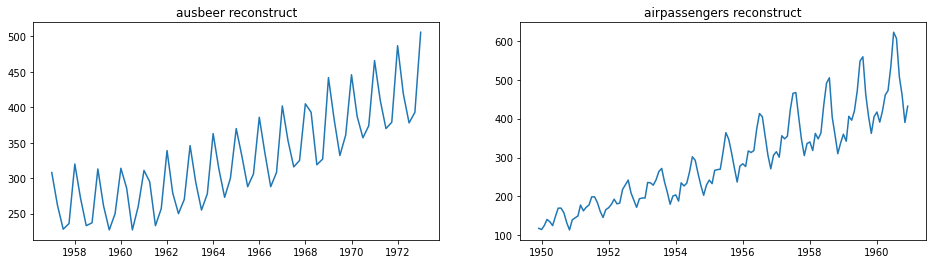

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 4))

ax1.plot(ausbeer_reconstruct)
ax1.set_title('ausbeer reconstruct')

ax2.plot(airpassengers_reconstruct)
ax2.set_title('airpassengers reconstruct')

# STL Decomposition

STL splits time series into seasonal, trend, and remainder component using LOESS(locally estimated scatterplot smoothing). [statsmodels.tsa][statsmodels] provide function for STL decomposition.



[statsmodels]: https://www.statsmodels.org/dev/examples/notebooks/generated/stl_decomposition.html

In [21]:
from statsmodels.tsa.seasonal import STL

plt.rc('figure',figsize=(16,12))

def plot_multiple_stl(stls, legend):
    base_fig = stls[0].plot()
    axs = base_fig.get_axes()
    comps = ['trend', 'seasonal', 'resid']
    
    for stl in stls[1:]:   
        for ax, comp in zip(axs[1:], comps):
            series = getattr(stl, comp)
            if comp == 'resid':
                ax.plot(series, marker='o', linestyle='none')
            else:
                ax.plot(series)
                if comp == 'trend':
                    ax.legend(legend, frameon=False)

Example of STL decomposition on **nybirths** dataset. nybirths dataset is the number of births per month in New York city, from January 1946 to December 1959 (originally collected by Newton)

In [22]:
nybirths = pd.read_csv('../../datasets/decomposition/nybirths.csv', names=['value'], header=None)

In [23]:
nybirths_ts = pd.Series(nybirths['value'].values,
                        index=pd.date_range('1946', periods=len(nybirths), freq='M'))

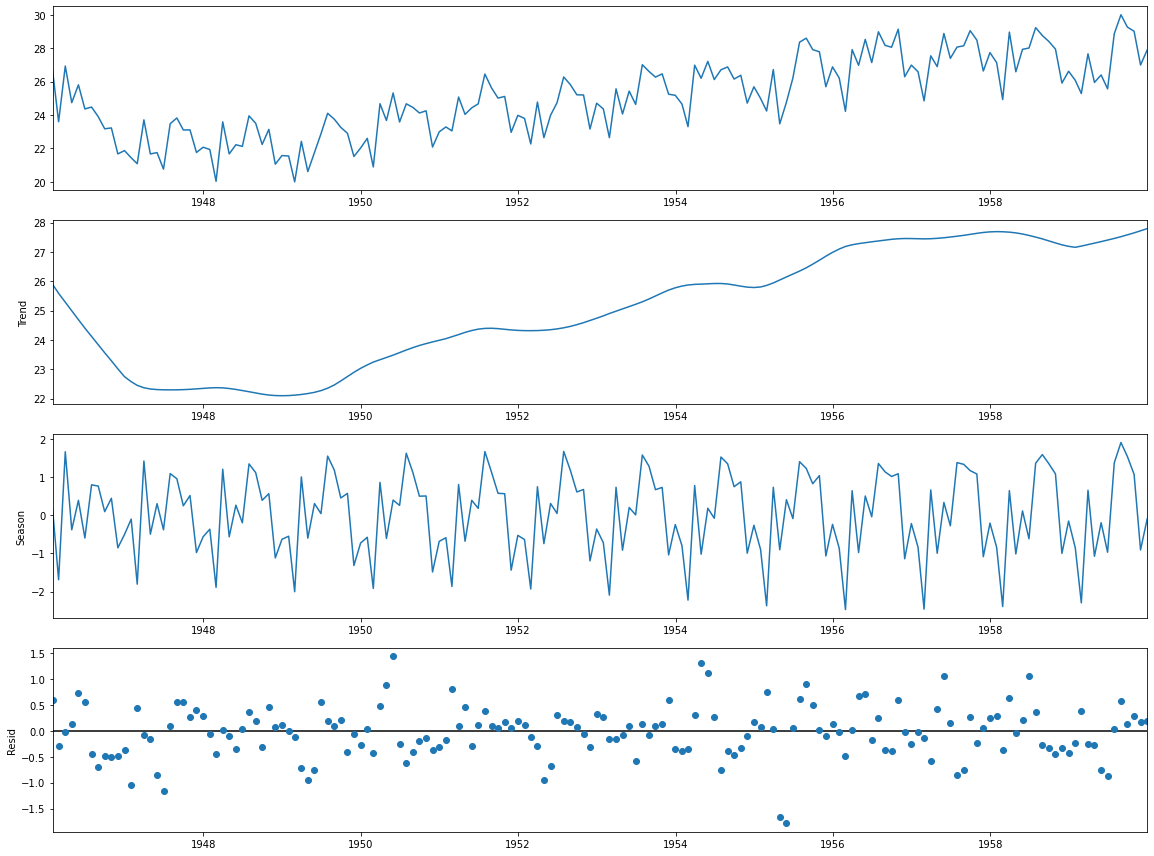

In [24]:
nybirths_stl = STL(nybirths_ts).fit()
nybirths_stl.plot()
plt.show()

### Robust Fitting

In [25]:
nybirths_stl_robust = STL(nybirths_ts, period=12, robust=True).fit()
nybirths_stl_robust_linear = STL(nybirths_ts, period=12, seasonal_deg=0, trend_deg=0, low_pass_deg=0, robust=True).fit()

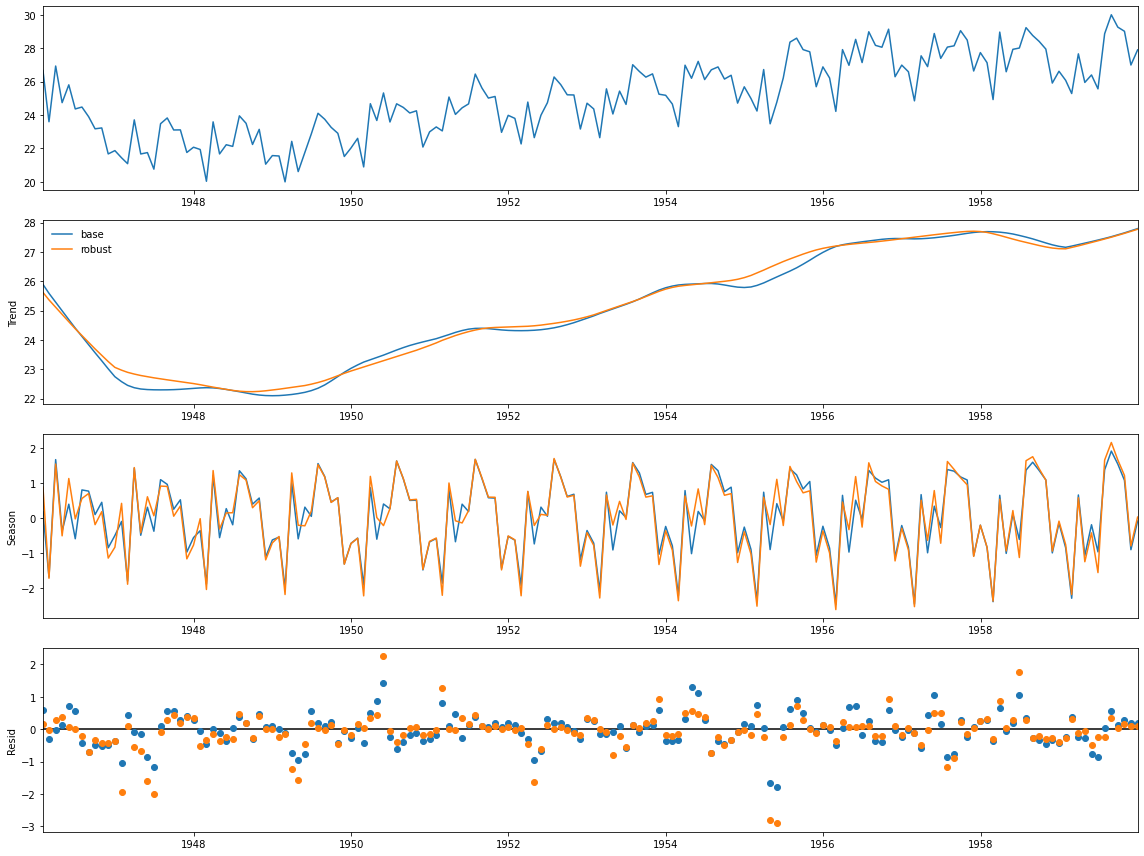

In [26]:
plot_multiple_stl([nybirths_stl, nybirths_stl_robust], ['base','robust'])

In [27]:
nybirths_stl_robust.weights

1946-01-31    0.972615
1946-02-28    0.998385
1946-03-31    0.919626
1946-04-30    0.847082
1946-05-31    0.996198
                ...   
1959-08-31    0.881746
1959-09-30    0.998708
1959-10-31    0.971652
1959-11-30    0.991161
1959-12-31    0.989186
Freq: M, Name: robust_weight, Length: 168, dtype: float64

In [28]:
nybirths_stl.weights

1946-01-31    1.0
1946-02-28    1.0
1946-03-31    1.0
1946-04-30    1.0
1946-05-31    1.0
             ... 
1959-08-31    1.0
1959-09-30    1.0
1959-10-31    1.0
1959-11-30    1.0
1959-12-31    1.0
Freq: M, Name: robust_weight, Length: 168, dtype: float64

### LOESS degree

In [29]:
from statsmodels.datasets import elec_equip as ds
elec_equip_ts = ds.load(as_pandas=True).data

In [30]:
elec_equip_stl = STL(elec_equip_ts).fit()
# elec_equip_stl_robust = STL(elec_equip_ts, period=12, robust=True).fit()
elec_equip_stl_robust_linear = STL(elec_equip_ts, period=12, seasonal_deg=0, trend_deg=0, low_pass_deg=0, robust=True).fit()

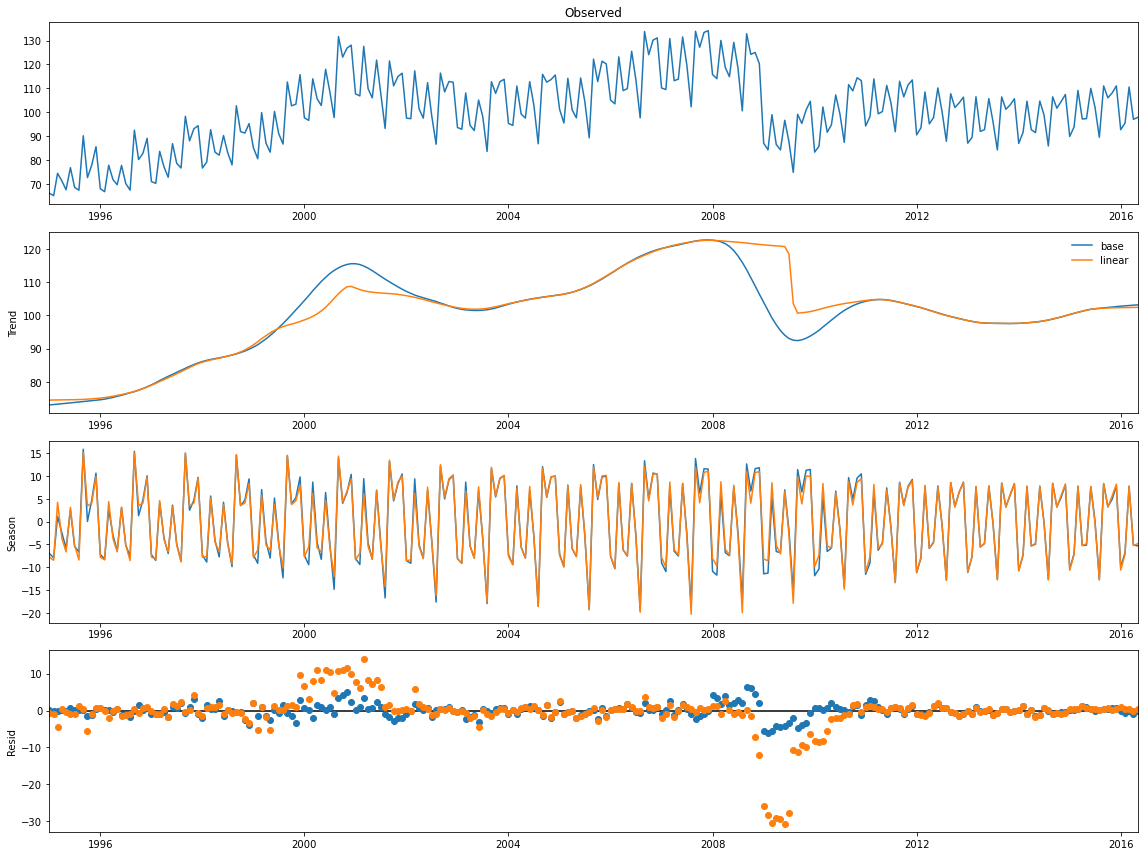

In [31]:
plot_multiple_stl([elec_equip_stl, elec_equip_stl_robust_linear], ['base','linear'])

## Measuring Strength of Trend and Seasonality

The strength of trend and seasonality can be measure using the following method:

Measuring the strength of trend,
$$ F_T = max \bigg(0, 1 - \frac{Var(R_t)}{Var(T_t+R_t)} \bigg) $$

Measuring the strength of seasonality,
$$ F_S = max \bigg(0, 1 - \frac{Var(R_t)}{Var(S_t+R_t)} \bigg) $$

A time series dataset depicting the total number of female births recording in California, USA during the year of 1959.

In [32]:
female_birth = pd.read_csv('../../datasets/decomposition/daily-total-female-births.csv')

female_birth_ts = pd.Series(female_birth['Births'].values, index= pd.date_range('1959-01-01', periods = len(female_birth) , freq='D'))

Text(0.5, 1.0, 'Daily Total Female Births')

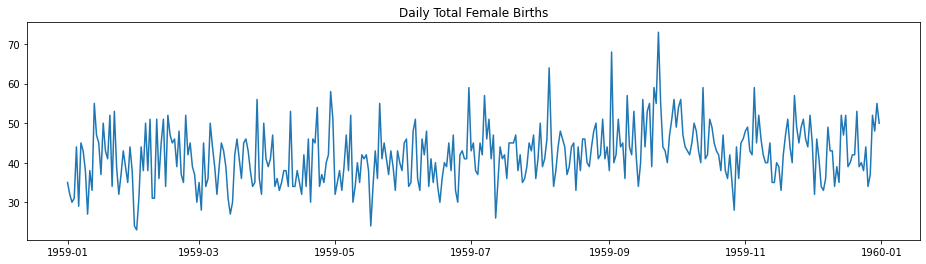

In [33]:
plt.rc('figure',figsize=(16,4))
plt.plot(female_birth_ts)
plt.title('Daily Total Female Births')

In [34]:
female_birth_tsl = STL(female_birth_ts).fit()

In [35]:
def get_seasonal_trend_strength(stl):
    trend_str = np.max([0, 1 - (np.var(stl.resid)/ np.var(stl.trend + stl.resid))])
    seasonal_str = np.max([0, 1 - (np.var(stl.resid)/ np.var(stl.seasonal + stl.resid))])
    return trend_str, seasonal_str
    

In [36]:
female_birth_trend_str, female_birth_seasonal_str = get_seasonal_trend_strength(female_birth_tsl)
print('strength of trend and seasonal: {} and {}'.format(female_birth_trend_str, female_birth_seasonal_str))

strength of trend and seasonal: 0.41780534876414066 and 0.42168540859028625


In [37]:
elec_trend_str, elec_seasonal_str = get_seasonal_trend_strength(elec_equip_stl)
print('strength of trend and seasonal: {} and {}'.format(elec_trend_str, elec_seasonal_str))

strength of trend and seasonal: 0.9818672335151971 and 0.9618442789555972


## Exercise

We will run through a simple exercise of time series decomposition.

Tasks that you are required to perform are list down as comment. Please insert your codes below the comment. An approximation of number of lines *n* is provided as a guideline to help you.

In [38]:
# we will be using additive method on furniture sales dataset
# import libraries (~ 3 lines of code)




# read furniture sales dataset from directory (~ 1 line of code) 
df = None

# set index (~ 1 line of code) 


# convert index to DateTimeIndex (~ 1 line of code)


# drop redundant column (~ 1 line of code) 



# trend estimation using SMA with window of 12 time steps (~ 6 lines of code)







In [39]:
# Below will be applying classical additive decomposition
# Detrending (~ 1 line of code)
df_detrend = None

# Seasonality estimation
# Extract the months and years into new columns 'Month' and 'Year' (~ 2 line of code)



# Reshape the DataFrame into columns based on months (~ 1 line of code)
df_reshape_with_nan = None

# Generate mean for each month  (~ 1 line of code)
df_seasonal_mean = None

# Remove rows that have NAN values (~ 1 line of code)
df_reshape = None

# Plot boxplot of 12 months distribution  (~ 1 line of code)

plt.show()

# Repeatedly fill up the mean for each rows (~ 1 line of code)
df_seasonal = None


# plot time plot for seasonal component (~ 1 line of code)

plt.show()


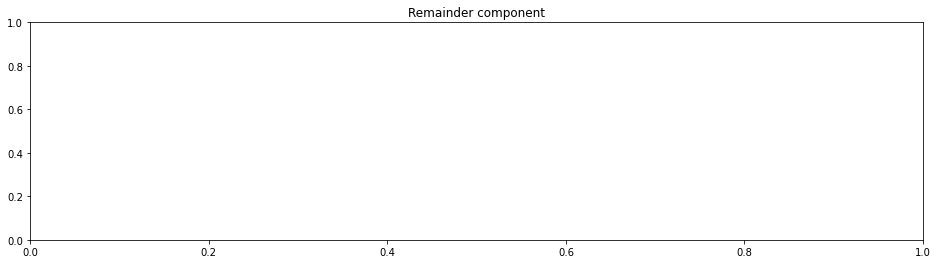

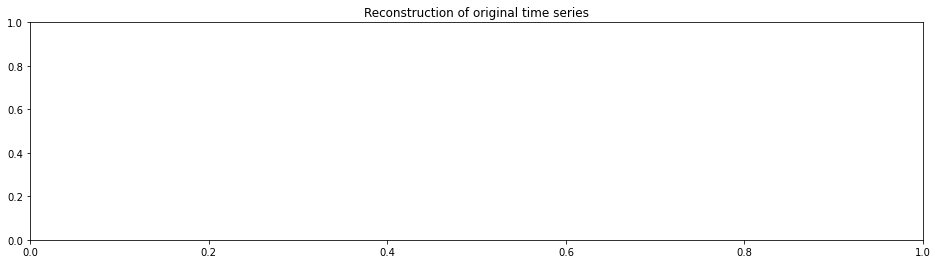

In [40]:
# Remainder
# compute the residual using trend and seasonal component extracted (~ 1 line of code)
df_remainder = None

# plot remainder component using time plot (~ 1 line of code)

plt.title("Remainder component")
plt.show()

# Reconstruction of original series (~ 1 line of code)
df_reconstruct = None

# plot the reconstructed series (~ 1 line of code)

plt.title("Reconstruction of original time series")
plt.show()

In [41]:
# STL decomposition using same dataset
# import library (~ 1 line of code)


# perform STL decomposition and output plot (~ 2 lines of code)


plt.show()

# References

1. https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

2. https://anomaly.io/seasonal-trend-decomposition-in-r/

3. http://web.vu.lt/mif/a.buteikis/wp-content/uploads/2019/02/Lecture_03.pdf